In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os

In [2]:
os.chdir('C:\\Users\\Hp\\Desktop\\Pyt_language\\machine-learning\\House_price')
df = pd.read_csv('bangalore house price prediction OHE-data.csv')
df.head()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
0,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#split data
x = df.drop('price',axis = 1)
y = df['price']

In [4]:
x.shape

(7120, 107)

In [5]:
y.shape

(7120,)

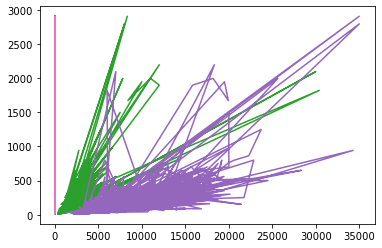

In [7]:
plt.plot(x,y)
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 50)
print('shape of x_train =',x_train.shape)
print('shape of y_train=',y_train.shape)
print('shape of x_test=',x_test.shape)
print('shape of y_test=',y_test.shape)

shape of x_train = (5696, 107)
shape of y_train= (5696,)
shape of x_test= (1424, 107)
shape of y_test= (1424,)


In [9]:
#feature scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [10]:
from sklearn .linear_model import LinearRegression
from sklearn .preprocessing import PolynomialFeatures

In [11]:
poly_reg = PolynomialFeatures(degree=2)
poly_reg.fit(x_train)
x_train_poly = poly_reg.transform (x_train)
x_test_poly = poly_reg.transform(x_test)

In [12]:
x_train_poly.shape,x_test_poly.shape

((5696, 5886), (1424, 5886))

In [14]:
lr = LinearRegression()
lr.fit(x_train_poly, y_train)

LinearRegression()

In [15]:
lr.score(x_test_poly,y_test)

0.9998353432053014

In [16]:
#to predict for single house 
lr.predict([x_test_poly[0,:]])

array([36.29])

In [17]:
#to predict for multiple house 
y_pred = lr.predict(x_test_poly)
y_pred

array([ 36.29, 124.  ,  67.  , ...,  74.  ,  44.8 ,  84.  ])

In [18]:
y_test

3813     36.29
2623    124.00
5318     67.00
6292    155.00
2354    130.00
         ...  
768     170.00
6591     52.00
4368     74.00
3090     44.80
5017     84.00
Name: price, Length: 1424, dtype: float64

In [19]:
#to find error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
mse,rmse

(2.326384949660572, 1.525249143471509)